# Homework 4 - Explaining wine quality prediction with SHAP

## Task A

The goal of this task is to explain the predictions of models on the wine quality dataset using SHAP.
Throughout this notebook, we consistently use the RandomForestClassifier model that we initially trained in Homework 1. Additionally, we exclusively use the LogisticRegression model for the final task.

To depict the sample data, we present two representative data points:
| Feature                | Sample 1 | Sample 11 |
|------------------------|----------|-----------|
| Fixed Acidity          | 6.3      | 8.6       |
| Volatile Acidity       | 0.30     | 0.23      |
| Citric Acid            | 0.34     | 0.40      |
| Residual Sugar         | 1.6      | 4.2       |
| Chlorides              | 0.049    | 0.035     |
| Free Sulfur Dioxide    | 14.0     | 17.0      |
| Total Sulfur Dioxide   | 132.0    | 109.0     |
| Density                | 0.9940   | 0.9947    |
| pH                     | 3.30     | 3.14      |
| Sulphates              | 0.49     | 0.53      |
| Alcohol                | 9.5      | 9.7       |

The RandomForest model predicts the probability of being a quality wine at 0.01 for both examples.

#### 4. The most important variable can vary from one example to another.

What is evident is that the key variable for the model changes based on the specific sample in question. For instance, `free/total sulfur dioxide` are the most important variables for observation 1, while for observation 11, these are `fixed/volatile acidity`. This observation remains consistent across both libraries used.

Results with dalex:
<div>
<img src="images/dalex.png" width="1000"/>
</div>
</br>

Results with shap:
<div>
<img src="images/shap_1.png" width="700"/>
<img src="images/shap_11.png" width="700"/>
</div>


#### 5. A variable may have either a positive or a negative impact.

Next, I identified a feature within the model, `fixed acidity`, that can have either a positive or negative influence on the prediction, depending on the specific sample. This effect is consistent across both libraries utilized.

for `dalex`:
<div>
<img src="images/dalex.png" width="1000"/>
</div>
</br>

for `shap`:
<div>
<img src="images/shap_1.png" width="700"/>
<img src="images/shap_11.png" width="700"/>
</div>

#### 6. `dalex` vs `shap`

The results from both libraries are largely consistent, though there are slight differences in the attribution scores. Since Shap is tailored for tree-based models, it operates more quickly than Dalex in the context of my experiments, which utilized a random forest setting.

#### 7. Explanations of different models

In this section, we aim to contrast the explanations provided by the previous model with those of Logistic Regression. This examination is particularly insightful because the predictions of Logistic Regression are based on the linearity of variables and their log-odds. In contrast, the Random Forest can capture far more intricate interactions between variables.

<div>
<img src="images/dalex_logistic.png" width="1000"/>
</div>

The interpretations derived from logistic regression differ from those of the random forest model. While the most critical variable remains fairly consistent between the two, the lesser important variables display notable differences in their levels of importance, and their ranking is mixed. 

One intriguing, systematic difference is observed: the logistic regression model consistently attributes greater importance to the alcohol percentage, a finding that aligns with the LIME explanations as well (which we discovered in Homework 3).

## Task B

Calculate Shapley values for player A given the following value function

```
v() = 0
v(A) = 20
v(B) = 20
v(C) = 60
v(A,B) = 60
v(A,C) = 70
v(B,C) = 70
v(A,B,C) = 100
```

Solution:

We create a table with all possible permutations of players:

| Probability | Order   | A's Marginal Contribution              |
|-------------|---------|----------------------------------------|
| 1/6         | (A,B,C) | v({A}) - v({}) = 20 - 0 = 20           |
| 1/6         | (A,C,B) | v({A}) - v({}) = 20 - 0 = 20           |
| 1/6         | (B,A,C) | v({A,B}) - v({B}) = 60 - 20 = 40       |
| 1/6         | (B,C,A) | v({A,B,C}) - v({B,C}) = 100 - 70 = 30  |
| 1/6         | (C,A,B) | v({A,C}) - v({C}) = 70 - 60 = 10       |
| 1/6         | (C,B,A) | v({A,B,C}) - v({B,C}) = 100 - 70 = 30  |


So we have

$\varphi_A = \frac{1}{6} \left( 20 * 2 + 40 + 10 + 30*2 \right) = \frac{150}{6} = 25$

## Appendix

#### 0. Import packages

In [3]:
!pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/f5/1f/21a1c97b2fca7629c2721ccdb565a4b24f6a66a11106f066e0849c0bd9a8/shap-0.43.0-cp39-cp39-macosx_10_9_x86_64.whl.metadata
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
  Obtaining dependency information for numba from https://files.pythonhosted.org/packages/b5/de/e2ef933a99c502d2ec5dda1a43a74ab98b1b606c0ff17422d42c62a6f00f/numba-0.58.1-cp39-cp39-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for cloudpickle from https://files.pythonhosted.org/packages/96/43/dae06432d0c4b1dc9e9149ad37b4ca8384cf6eb7700cd9215b177b914f0a/cloudpickle-3.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for llvmlite<0.42,>=0.41.0dev0 from https://files.pythonhosted.org/packages/fc/7a/c6741000d767fed4b339fcd4fa65afbc5fe776473d5f9e9c41eceab0a7c6/llvmlite-0.41.1-cp39-cp39-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.3/450.3 kB 1.8 MB/s eta 0:00:0000:

In [4]:
import dalex as dx
import shap

import random
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (5,3)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

### Train a tree-based ensemble model

#### 1.1 Load dataset

In [5]:
TARGET_COL = 'is_good'

cols = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol',
    TARGET_COL
]

df = pd.read_csv('wine_quality.csv', header=0, names=cols)
df[TARGET_COL] = df[TARGET_COL].replace(-1, 0)
X = df.drop(TARGET_COL, axis=1)
y = df[TARGET_COL]
print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (4898, 11)
y: (4898,)


#### 1.2 Fit models from Homework 1

In [135]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=25),
    "Forest": RandomForestClassifier(random_state=25)
}

for model in models.values():
    model.fit(X, y)

### 2 Calculate the predictions for some selected observations

In [160]:
indexes = [1, 11]
X_sample = X.iloc[indexes]
print(X_sample.head())

    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1             6.3              0.30         0.34             1.6      0.049   
11            8.6              0.23         0.40             4.2      0.035   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1                  14.0                 132.0   0.9940  3.30       0.49   
11                 17.0                 109.0   0.9947  3.14       0.53   

    alcohol  
1       9.5  
11      9.7  


In [161]:
models["Forest"].predict_proba(X_sample)[:,-1]

array([0.01, 0.01])

### 3 Explain these predictions using SHAP from different libraries: dalex and shap
#### 3.1 Explain using dalex

In [162]:
explainers_dalex = {}
for model_name, model in models.items():
    explainer = dx.Explainer(model, X, y)
    explainers_dalex[model_name] = explainer

Preparation of a new explainer is initiated

  -> data              : 4898 rows 11 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 4898 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x11b8f3a60> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.98e-05, mean = 0.0374, max = 0.789
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.6, mean = -6.09e-06, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 4898 rows 11 cols
  -> target variable   :

/Users/michal.janik/studia/XAI/.env/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/Users/michal.janik/studia/XAI/.env/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



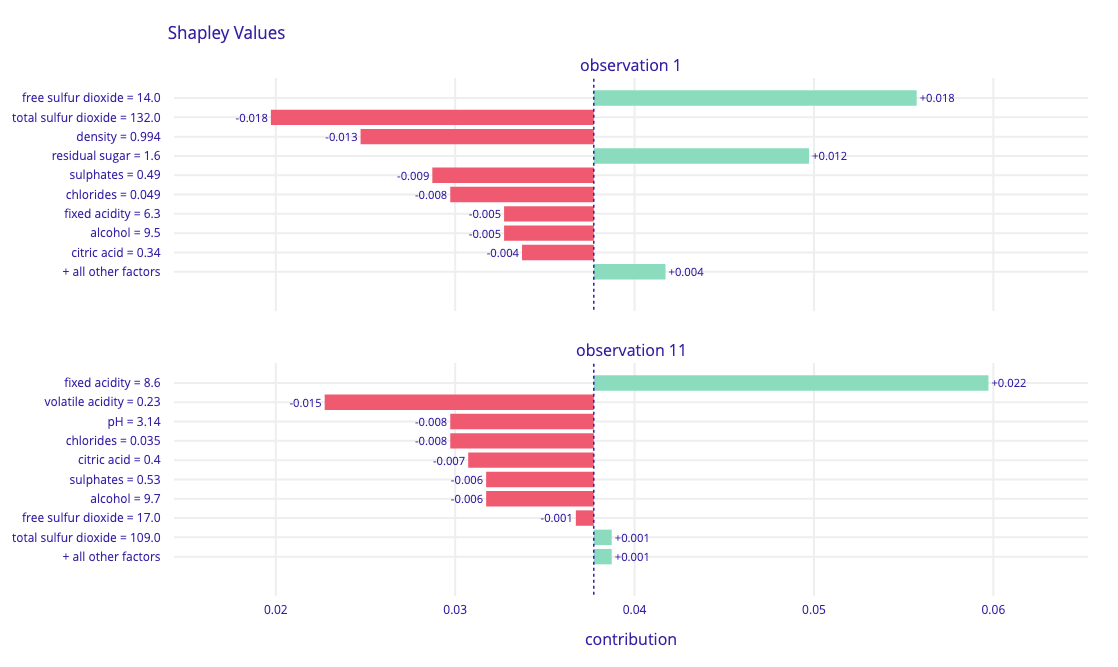

In [163]:
seed = 44

shap_attributions = [
    explainers_dalex['Forest'].predict_parts(obs, type="shap", label=f'observation {obs_id}', random_state=seed)
    for obs_id, obs in zip(indexes, X_sample.values)
]
shap_attributions[0].plot(shap_attributions[1:])

#### 3.2 Explain using shap

In [164]:
explainers_shap = {}

explainers_shap["Forest"] = shap.explainers.Tree(models["Forest"], data=X, model_output="probability", random_state=seed)
shap_values = explainers_shap["Forest"](X)[:,:,1]

100%|===================| 9792/9796 [01:24<00:00]        

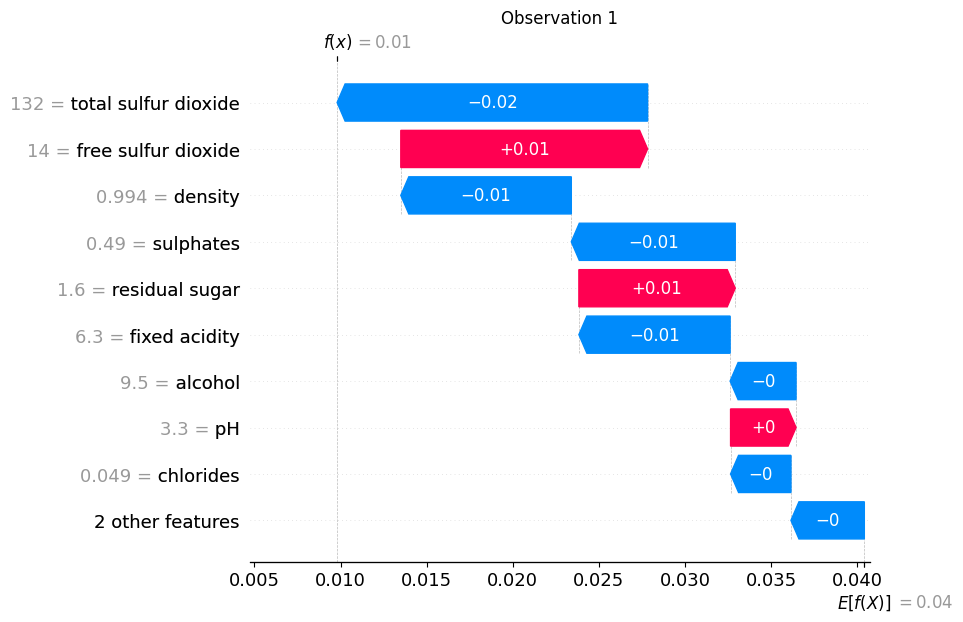

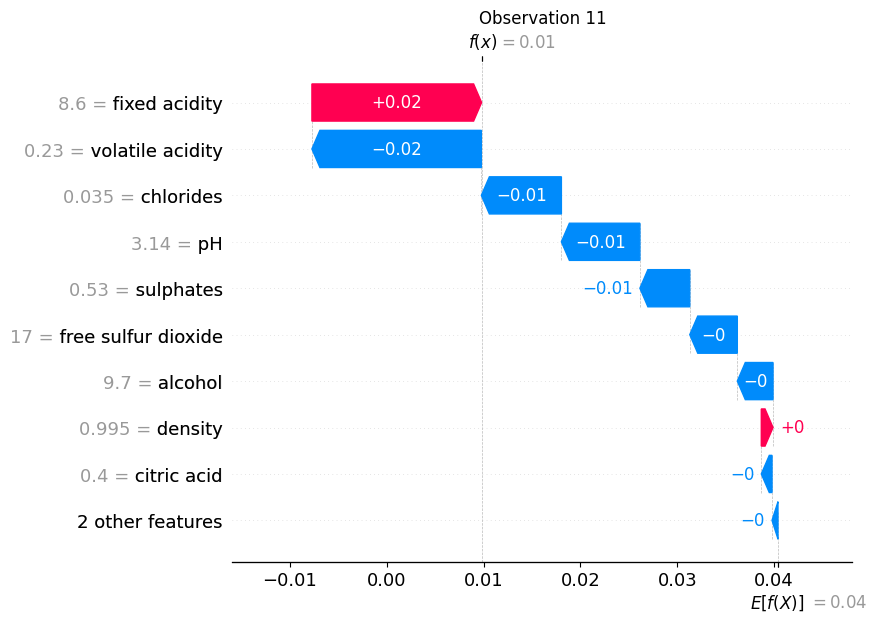

In [167]:
for obs_id in indexes:
    plt.title(f'Observation {obs_id}')
    shap.plots.waterfall(shap_values[obs_id])

### 7. Different model evaluated using dalex - LogiticRegression

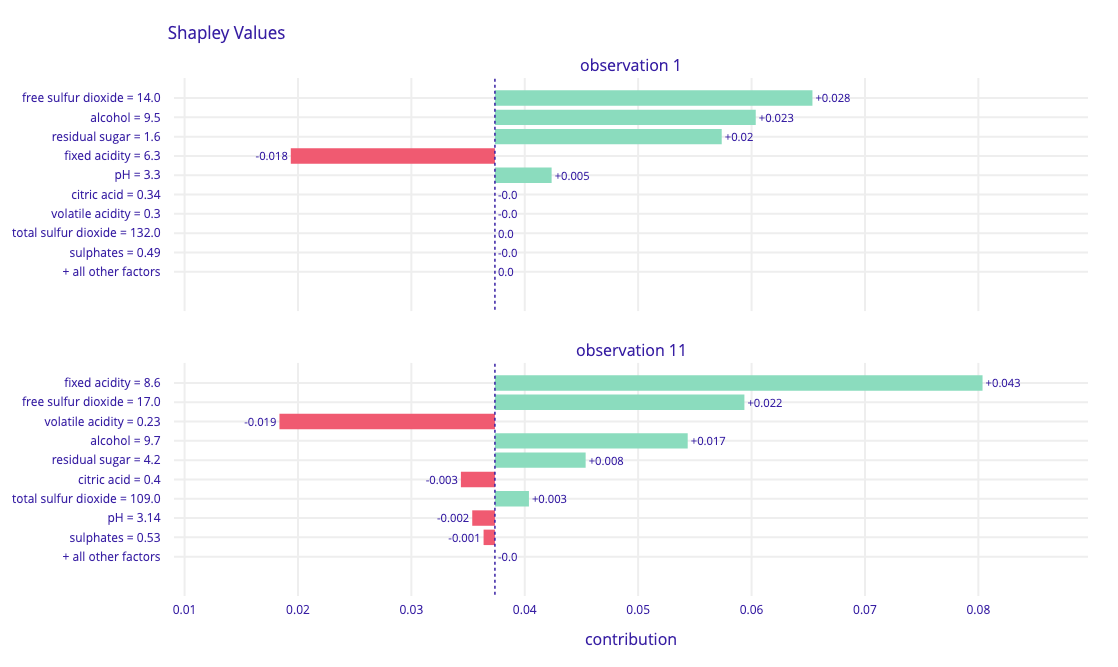

In [169]:
seed = 44

shap_attributions = [
    explainers_dalex['LogisticRegression'].predict_parts(obs, type="shap", label=f'observation {obs_id}', random_state=seed)
    for obs_id, obs in zip(indexes, X_sample.values)
]
shap_attributions[0].plot(shap_attributions[1:])